## NPS Model

In [66]:
#Loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os

!pip install imblearn
!pip install pycaret
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from pycaret.classification import *

import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#loading xgboost and catboost classifier libraries
!pip install xgboost
!pip install catboost
import xgboost as xgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#checking current directory
os.getcwd()

'/home/ec2-user/SageMaker'

# DATASET

In [3]:
#Loading NPS dataset
df = pd.read_csv('NPSTask.csv')

In [4]:
df.shape

(122491, 20)

In [5]:
df.head()

,Survey_Id,Response_Date,Store_ID,Store_Name,Transaction_Date,NPS,Product_Range,Value_For_Money,Product_Quality,Product_Availability,Environment,Staff_Availability,Knowledge,Friendly,Speed,Gender,Age,Had_a_Fitting,C&C,Category
0,44375508,20220121,467,READING SOUTH,18/01/2022,7,6,5,5,3,4,3,4,2,3,1,2,1,0,Motoring
1,44375536,20220122,548,North Shields,19/01/2022,7,6,5,6,7,6,5,5,7,5,2,1,0,0,Motoring
2,44375593,20220122,148,Dundalk,19/01/2022,10,7,7,7,7,7,7,7,7,7,2,1,0,1,Motoring
3,44375599,20220122,701,Lowestoft,19/01/2022,10,7,7,7,7,7,5,7,7,7,2,1,0,1,Motoring
4,44375617,20220122,855,Netherfield,19/01/2022,10,7,7,7,7,7,7,7,7,7,1,1,1,1,Cycling


In [6]:
#checking for missing values
df.isna().sum().sum()

0

In [7]:
df.describe()

,Survey_Id,Response_Date,Store_ID,NPS,Product_Range,Value_For_Money,Product_Quality,Product_Availability,Environment,Staff_Availability,Knowledge,Friendly,Speed,Gender,Age,Had_a_Fitting,C&C
count,1.224910e+05,1.224910e+05,122491.000000,122491.000000,122491.000000,122491.000000,122491.000000,122491.000000,122491.000000,122491.000000,122491.000000,122491.000000,122491.000000,122491.000000,122491.000000,122491.000000,122491.000000
mean,4.418565e+07,2.021566e+07,656.193369,9.087206,6.309443,6.039946,7.982366,6.223412,6.217420,6.237422,6.537737,6.563658,6.376289,1.744855,2.026010,0.291817,0.277604
std,1.496511e+05,4.449045e+03,208.729125,1.597891,1.172580,1.235333,404.045958,1.294891,1.193793,1.356020,1.199547,1.068020,1.288349,0.596373,0.921621,0.454601,0.447819
min,4.392354e+07,2.021120e+07,6.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,4.406109e+07,2.021122e+07,482.000000,9.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,7.000000,6.000000,1.000000,1.000000,0.000000,0.000000
50%,4.418380e+07,2.021123e+07,711.000000,10.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,2.000000,2.000000,0.000000,0.000000
75%,4.431633e+07,2.022012e+07,825.000000,10.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,2.000000,3.000000,1.000000,1.000000
max,4.444515e+07,2.022013e+07,996.000000,10.000000,8.000000,8.000000,99999.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,4.000000,4.000000,1.000000,1.000000


#### preprocessing the data

In [8]:
#dropping id columns and date columns
drop = ['Survey_Id','Response_Date','Store_Name','Transaction_Date','Store_ID']

In [9]:
df = df.drop(drop, axis=1)
df.head()

,NPS,Product_Range,Value_For_Money,Product_Quality,Product_Availability,Environment,Staff_Availability,Knowledge,Friendly,Speed,Gender,Age,Had_a_Fitting,C&C,Category
0,7,6,5,5,3,4,3,4,2,3,1,2,1,0,Motoring
1,7,6,5,6,7,6,5,5,7,5,2,1,0,0,Motoring
2,10,7,7,7,7,7,7,7,7,7,2,1,0,1,Motoring
3,10,7,7,7,7,7,5,7,7,7,2,1,0,1,Motoring
4,10,7,7,7,7,7,7,7,7,7,1,1,1,1,Cycling


In [10]:
df.shape

(122491, 15)

In [11]:
#converting target variable into 3 NPS categories to stablish the NPS score
def NPSscore(df):    
    if (df['NPS'] in (0,1,2,3,4,5,6)):
        return 'Detractors'
    elif (df['NPS'] in (7,8)):
        return 'Passives'
    elif (df['NPS'] in (9,10)):
        return 'Promoters'

In [12]:
df['NPS_cat'] = df.apply(NPSscore, axis = 1)

In [13]:
df

,NPS,Product_Range,Value_For_Money,Product_Quality,Product_Availability,Environment,Staff_Availability,Knowledge,Friendly,Speed,Gender,Age,Had_a_Fitting,C&C,Category,NPS_cat
0,7,6,5,5,3,4,3,4,2,3,1,2,1,0,Motoring,Passives
1,7,6,5,6,7,6,5,5,7,5,2,1,0,0,Motoring,Passives
2,10,7,7,7,7,7,7,7,7,7,2,1,0,1,Motoring,Promoters
3,10,7,7,7,7,7,5,7,7,7,2,1,0,1,Motoring,Promoters
4,10,7,7,7,7,7,7,7,7,7,1,1,1,1,Cycling,Promoters
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122486,8,8,7,7,7,5,6,7,7,7,2,2,0,0,Motoring,Passives
122487,10,7,7,7,7,7,7,7,7,7,2,1,0,0,Motoring,Promoters
122488,9,6,8,5,7,4,4,8,5,5,2,1,0,1,Motoring,Promoters
122489,7,5,5,6,6,5,6,6,6,6,2,1,0,0,Motoring,Passives


In [14]:
drop2 = ['NPS']

In [15]:
#dropping the NPS score field
df = df.drop(drop2, axis=1)
df.head()

,Product_Range,Value_For_Money,Product_Quality,Product_Availability,Environment,Staff_Availability,Knowledge,Friendly,Speed,Gender,Age,Had_a_Fitting,C&C,Category,NPS_cat
0,6,5,5,3,4,3,4,2,3,1,2,1,0,Motoring,Passives
1,6,5,6,7,6,5,5,7,5,2,1,0,0,Motoring,Passives
2,7,7,7,7,7,7,7,7,7,2,1,0,1,Motoring,Promoters
3,7,7,7,7,7,5,7,7,7,2,1,0,1,Motoring,Promoters
4,7,7,7,7,7,7,7,7,7,1,1,1,1,Cycling,Promoters


In [16]:
df = df.replace([99999],8)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122491 entries, 0 to 122490
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Product_Range         122491 non-null  int64 
 1   Value_For_Money       122491 non-null  int64 
 2   Product_Quality       122491 non-null  int64 
 3   Product_Availability  122491 non-null  int64 
 4   Environment           122491 non-null  int64 
 5   Staff_Availability    122491 non-null  int64 
 6   Knowledge             122491 non-null  int64 
 7   Friendly              122491 non-null  int64 
 8   Speed                 122491 non-null  int64 
 9   Gender                122491 non-null  int64 
 10  Age                   122491 non-null  int64 
 11  Had_a_Fitting         122491 non-null  int64 
 12  C&C                   122491 non-null  int64 
 13  Category              122491 non-null  object
 14  NPS_cat               122491 non-null  object
dtypes: int64(13), obj

In [18]:
df.shape

(122491, 15)

In [19]:
df.describe()

,Product_Range,Value_For_Money,Product_Quality,Product_Availability,Environment,Staff_Availability,Knowledge,Friendly,Speed,Gender,Age,Had_a_Fitting,C&C
count,122491.000000,122491.000000,122491.000000,122491.000000,122491.000000,122491.000000,122491.000000,122491.000000,122491.000000,122491.000000,122491.000000,122491.000000,122491.000000
mean,6.309443,6.039946,6.349740,6.223412,6.217420,6.237422,6.537737,6.563658,6.376289,1.744855,2.026010,0.291817,0.277604
std,1.172580,1.235333,1.080184,1.294891,1.193793,1.356020,1.199547,1.068020,1.288349,0.596373,0.921621,0.454601,0.447819
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,7.000000,6.000000,1.000000,1.000000,0.000000,0.000000
50%,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,2.000000,2.000000,0.000000,0.000000
75%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,2.000000,3.000000,1.000000,1.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,4.000000,4.000000,1.000000,1.000000


In [20]:
df.head()

,Product_Range,Value_For_Money,Product_Quality,Product_Availability,Environment,Staff_Availability,Knowledge,Friendly,Speed,Gender,Age,Had_a_Fitting,C&C,Category,NPS_cat
0,6,5,5,3,4,3,4,2,3,1,2,1,0,Motoring,Passives
1,6,5,6,7,6,5,5,7,5,2,1,0,0,Motoring,Passives
2,7,7,7,7,7,7,7,7,7,2,1,0,1,Motoring,Promoters
3,7,7,7,7,7,5,7,7,7,2,1,0,1,Motoring,Promoters
4,7,7,7,7,7,7,7,7,7,1,1,1,1,Cycling,Promoters


## EDA

<AxesSubplot:>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


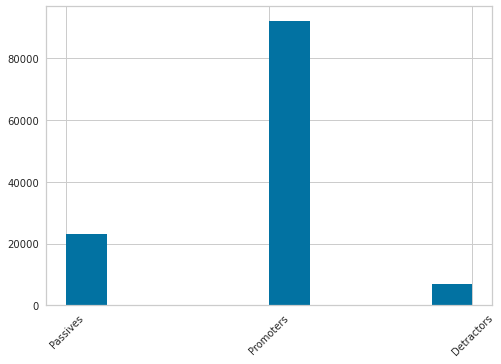

In [21]:
df['NPS_cat'].hist(xrot=45)

In [22]:
df['NPS_cat'].value_counts(normalize=True).sort_values()

Detractors    0.057000
Passives      0.189932
Promoters     0.753068
Name: NPS_cat, dtype: float64

In [23]:
#Questions: 
#1) How big is our customer base?
#2) What these porportione looks like when looking at the whole base?
#3) Do we see equivalent splits when looking at relevant sub-groups (segments) of our base?

#### univariate analysis

<AxesSubplot:xlabel='C&C', ylabel='count'>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


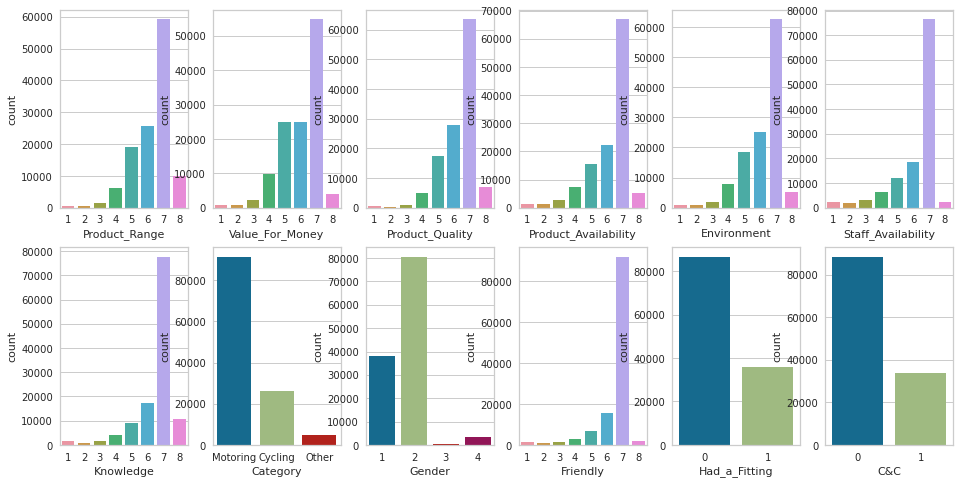

In [24]:
fig, ax = plt.subplots(2, 6, figsize=(16,8))

sns.countplot(df['Product_Range'], ax=ax[0,0])
sns.countplot(df['Value_For_Money'], ax=ax[0,1])
sns.countplot(df['Product_Quality'], ax=ax[0,2])
sns.countplot(df['Product_Availability'], ax=ax[0,3])
sns.countplot(df['Environment'], ax=ax[0,4])
sns.countplot(df['Staff_Availability'], ax=ax[0,5])

sns.countplot(df['Knowledge'], ax=ax[1,0])
sns.countplot(df['Category'], ax=ax[1,1])
sns.countplot(df['Gender'], ax=ax[1,2])
sns.countplot(df['Friendly'], ax=ax[1,3])
sns.countplot(df['Had_a_Fitting'], ax=ax[1,4])
sns.countplot(df['C&C'], ax=ax[1,5])

#### bivariate analysis

<AxesSubplot:xlabel='NPS_cat'>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


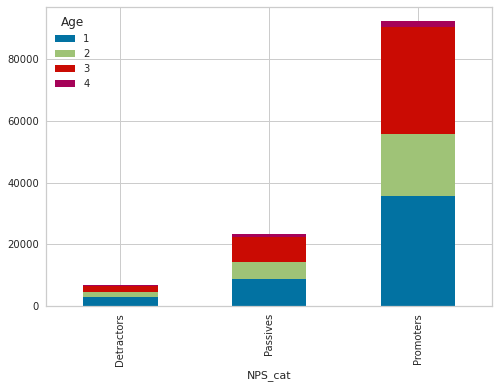

In [25]:
df_plot = df.groupby(['Age', 'NPS_cat']).size().reset_index().pivot(columns='Age', index='NPS_cat', values=0)
df_plot.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='NPS_cat'>

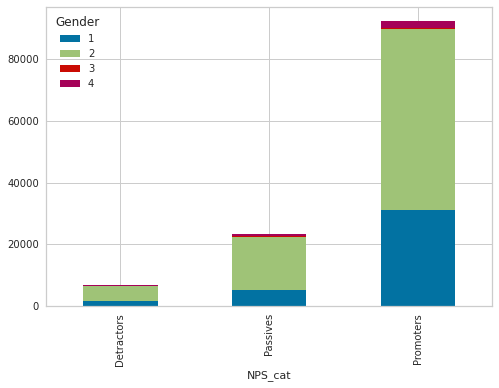

In [26]:
df_plot = df.groupby(['Gender', 'NPS_cat']).size().reset_index().pivot(columns='Gender', index='NPS_cat', values=0)
df_plot.plot(kind='bar', stacked=True)

#### generating the train, test and val datasets

# MODEL

#### creating train and test dataset

In [27]:
# storing features and target in separate variables
label = df['NPS_cat']
features = df.drop('NPS_cat', axis=1)

In [28]:
features

,Product_Range,Value_For_Money,Product_Quality,Product_Availability,Environment,Staff_Availability,Knowledge,Friendly,Speed,Gender,Age,Had_a_Fitting,C&C,Category
0,6,5,5,3,4,3,4,2,3,1,2,1,0,Motoring
1,6,5,6,7,6,5,5,7,5,2,1,0,0,Motoring
2,7,7,7,7,7,7,7,7,7,2,1,0,1,Motoring
3,7,7,7,7,7,5,7,7,7,2,1,0,1,Motoring
4,7,7,7,7,7,7,7,7,7,1,1,1,1,Cycling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122486,8,7,7,7,5,6,7,7,7,2,2,0,0,Motoring
122487,7,7,7,7,7,7,7,7,7,2,1,0,0,Motoring
122488,6,8,5,7,4,4,8,5,5,2,1,0,1,Motoring
122489,5,5,6,6,5,6,6,6,6,2,1,0,0,Motoring


#### features

In [29]:
# Create a boolean mask for categorical columns
categorical_mask = features.dtypes == object
categorical_mask

Product_Range           False
Value_For_Money         False
Product_Quality         False
Product_Availability    False
Environment             False
Staff_Availability      False
Knowledge               False
Friendly                False
Speed                   False
Gender                  False
Age                     False
Had_a_Fitting           False
C&C                     False
Category                 True
dtype: bool

In [30]:
# Get list of categorical column names
categorical_columns = features.columns[categorical_mask].tolist()
categorical_columns

['Category']

In [31]:
# Print the head of the categorical columns
print(features[categorical_columns].head())

   Category
0  Motoring
1  Motoring
2  Motoring
3  Motoring
4   Cycling


In [32]:
onehotencoder = OneHotEncoder()

In [33]:
# apply le on categorical feature columns
transformed_data = onehotencoder.fit_transform(features[categorical_columns])

In [34]:
# OneHotEncoder returns a sparse matrix
transformed_data

<122491x3 sparse matrix of type '<class 'numpy.float64'>'
	with 122491 stored elements in Compressed Sparse Row format>

In [35]:
enc_data=pd.DataFrame((transformed_data).toarray())
enc_data

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
122486,0.0,1.0,0.0
122487,0.0,1.0,0.0
122488,0.0,1.0,0.0
122489,0.0,1.0,0.0


In [36]:
enc_data.columns = onehotencoder.get_feature_names(['Category'])

In [37]:
#Merge with main
#features_encoded=features.join(enc_data)
features_encoded= pd.concat([features, enc_data], axis=1)

In [38]:
features_encoded=features_encoded.drop('Category', axis=1)
features_encoded

,Product_Range,Value_For_Money,Product_Quality,Product_Availability,Environment,Staff_Availability,Knowledge,Friendly,Speed,Gender,Age,Had_a_Fitting,C&C,Category_Cycling,Category_Motoring,Category_Other
0,6,5,5,3,4,3,4,2,3,1,2,1,0,0.0,1.0,0.0
1,6,5,6,7,6,5,5,7,5,2,1,0,0,0.0,1.0,0.0
2,7,7,7,7,7,7,7,7,7,2,1,0,1,0.0,1.0,0.0
3,7,7,7,7,7,5,7,7,7,2,1,0,1,0.0,1.0,0.0
4,7,7,7,7,7,7,7,7,7,1,1,1,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122486,8,7,7,7,5,6,7,7,7,2,2,0,0,0.0,1.0,0.0
122487,7,7,7,7,7,7,7,7,7,2,1,0,0,0.0,1.0,0.0
122488,6,8,5,7,4,4,8,5,5,2,1,0,1,0.0,1.0,0.0
122489,5,5,6,6,5,6,6,6,6,2,1,0,0,0.0,1.0,0.0


#### label

In [39]:
label

0          Passives
1          Passives
2         Promoters
3         Promoters
4         Promoters
            ...    
122486     Passives
122487    Promoters
122488    Promoters
122489     Passives
122490    Promoters
Name: NPS_cat, Length: 122491, dtype: object

In [40]:
# ordinal encode target variable
label_encoder = LabelEncoder()

In [41]:
label_encoder.fit(label)
label_encoded = label_encoder.transform(label)

In [42]:
label_encoded

array([1, 1, 2, ..., 2, 1, 2])

In [43]:
# converting an array to dataframe
label_encoded = pd.DataFrame(label_encoded)
label_encoded

,0
0,1
1,1
2,2
3,2
4,2
...,...
122486,1
122487,2
122488,2
122489,1


In [44]:
label_encoded.rename(columns = {0:'y'}, inplace = True)

In [45]:
label_encoded

,y
0,1
1,1
2,2
3,2
4,2
...,...
122486,1
122487,2
122488,2
122489,1


#### creating the train, validation and test datset

In [46]:
# creating the train, validation and test datset
x_train, x_test, y_train, y_test = train_test_split(features_encoded, label_encoded, test_size=0.3, random_state=0)

In [47]:
y_train['y'].value_counts().sort_values()

0     4946
1    16274
2    64523
Name: y, dtype: int64

In [48]:
y_train['y'].value_counts(normalize=True).sort_values()

0    0.057684
1    0.189800
2    0.752516
Name: y, dtype: float64

In [49]:
x_train.shape

(85743, 16)

In [50]:
x_test.shape

(36748, 16)

In [51]:
y_test.shape

(36748, 1)

In [52]:
y_test['y'].value_counts().sort_values()

0     2036
1     6991
2    27721
Name: y, dtype: int64

In [53]:
y_test['y'].value_counts(normalize=True).sort_values()

0    0.055404
1    0.190242
2    0.754354
Name: y, dtype: float64

#### Logistic regression - lr

In [54]:
#instatiating the estimator
lr = LogisticRegression(multi_class="ovr")

In [55]:
# fitting lr classifier to the training set
lr_model = lr.fit(x_train, y_train)

In [56]:
# predicting on test set
y_predicted = lr_model.predict(x_test)

In [57]:
print("OVR training accuracy:", lr_model.score(x_train, y_train))
print("OVR test accuracy    :", lr_model.score(x_test, y_test))

OVR training accuracy: 0.7930210046301156
OVR test accuracy    : 0.790383150103407


In [58]:
print(confusion_matrix(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

[[  641   720   675]
 [  222  1637  5132]
 [  107   847 26767]]
              precision    recall  f1-score   support

           0       0.66      0.31      0.43      2036
           1       0.51      0.23      0.32      6991
           2       0.82      0.97      0.89     27721

    accuracy                           0.79     36748
   macro avg       0.66      0.50      0.55     36748
weighted avg       0.75      0.79      0.75     36748



#### Over Sampling

In [59]:
over_sampler = SMOTE()

In [60]:
# applying resampling to the training set only
x_resampled, y_resampled = over_sampler.fit_resample(x_train, y_train)

In [61]:
y_train.groupby(['y']).size()

y
0     4946
1    16274
2    64523
dtype: int64

In [62]:
y_resampled.groupby(['y']).size()

y
0    64523
1    64523
2    64523
dtype: int64

In [63]:
# fitting lr classifier to the training set
lr_model_resampled = lr_model.fit(x_resampled, y_resampled)

In [64]:
# predicting on test set
y_predicted_resampled = lr_model_resampled.predict(x_test)

In [65]:
print("OVR training accuracy:", lr_model_resampled.score(x_resampled, y_resampled))
print("OVR test accuracy    :", lr_model_resampled.score(x_test, y_test))

OVR training accuracy: 0.6608909484473237
OVR test accuracy    : 0.743850005442473


In [65]:
print(confusion_matrix(y_test, y_predicted_resampled))
print(classification_report(y_test, y_predicted_resampled))

[[ 1339   395   302]
 [ 1699  2961  2331]
 [ 1015  3668 23038]]
              precision    recall  f1-score   support

           0       0.33      0.66      0.44      2036
           1       0.42      0.42      0.42      6991
           2       0.90      0.83      0.86     27721

    accuracy                           0.74     36748
   macro avg       0.55      0.64      0.58     36748
weighted avg       0.78      0.74      0.76     36748



#### XGBoost  

In [70]:
# Instantiate the XGBClassifier: xg_cl
xgb = XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

In [71]:
# fitting xgb classifier to the training set
xgb_model = xgb.fit(x_train,y_train)

[18:43:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [72]:
# predicting the labels of the test set: preds
y_predicted_xgb = xgb_model.predict(x_test)

In [73]:
print("OVR training accuracy:", xgb_model.score(x_train, y_train))
print("OVR test accuracy    :", xgb_model.score(x_test, y_test))

OVR training accuracy: 0.8148070396417201
OVR test accuracy    : 0.8067649940132796


In [74]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_predicted_xgb))
print(classification_report(y_test, y_predicted_xgb))

[[  892   719   425]
 [  270  2734  3987]
 [  141  1559 26021]]
              precision    recall  f1-score   support

           0       0.68      0.44      0.53      2036
           1       0.55      0.39      0.46      6991
           2       0.86      0.94      0.89     27721

    accuracy                           0.81     36748
   macro avg       0.70      0.59      0.63     36748
weighted avg       0.79      0.81      0.79     36748



findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


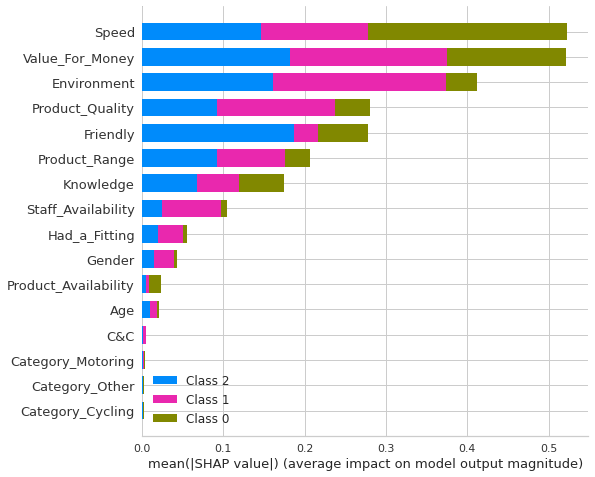

In [71]:
# computing feature importance
import shap
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train, plot_type="bar")

#### XGBoost Over Sampling

In [ ]:
# x_resampled, y_resampled = over_sampler.fit_resample(x_train, y_train)

In [78]:
# fitting lr classifier to the training set
xgb_model_resampled = xgb_model.fit(x_resampled, y_resampled)

[18:45:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [84]:
y_resampled.groupby(['y']).size()

y
0    64523
1    64523
2    64523
dtype: int64

In [79]:
# predicting on test set
y_predicted_resampled_xgb = xgb_model_resampled.predict(x_test)

In [80]:
print("OVR training accuracy:", xgb_model_resampled.score(x_resampled, y_resampled))
print("OVR test accuracy    :", xgb_model_resampled.score(x_test, y_test))

OVR training accuracy: 0.7242275364340365
OVR test accuracy    : 0.7401491237618374


In [81]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_predicted_resampled_xgb))
print(classification_report(y_test, y_predicted_resampled_xgb))

[[ 1374   510   152]
 [  999  4434  1558]
 [  688  5642 21391]]
              precision    recall  f1-score   support

           0       0.45      0.67      0.54      2036
           1       0.42      0.63      0.50      6991
           2       0.93      0.77      0.84     27721

    accuracy                           0.74     36748
   macro avg       0.60      0.69      0.63     36748
weighted avg       0.80      0.74      0.76     36748



#### XGBoost undersampling

In [67]:
under_sampler = RandomUnderSampler()

In [68]:
# applying resampling to the training set only
x_undersampled, y_undersampled = under_sampler.fit_resample(x_train, y_train)

In [85]:
y_undersampled.groupby(['y']).size()

y
0    4946
1    4946
2    4946
dtype: int64

In [75]:
# fitting lr classifier to the training set
xgb_model_undersampled = xgb_model.fit(x_undersampled, y_undersampled)

[18:43:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [76]:
y_predicted_undersampled = xgb_model_undersampled.predict(x_test)

In [83]:
print("OVR training accuracy:", xgb_model_undersampled.score(x_train, y_train))
print("OVR test accuracy    :", xgb_model_undersampled.score(x_test, y_test))

OVR training accuracy: 0.7421013960323292
OVR test accuracy    : 0.7401491237618374


In [82]:
print(confusion_matrix(y_test, y_predicted_undersampled))
print(classification_report(y_test, y_predicted_undersampled))

[[ 1467   434   135]
 [ 1227  4367  1397]
 [  845  5964 20912]]
              precision    recall  f1-score   support

           0       0.41      0.72      0.53      2036
           1       0.41      0.62      0.49      6991
           2       0.93      0.75      0.83     27721

    accuracy                           0.73     36748
   macro avg       0.58      0.70      0.62     36748
weighted avg       0.80      0.73      0.75     36748



#### kFold cross-validation accross models

[14:32:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:32:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:32:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

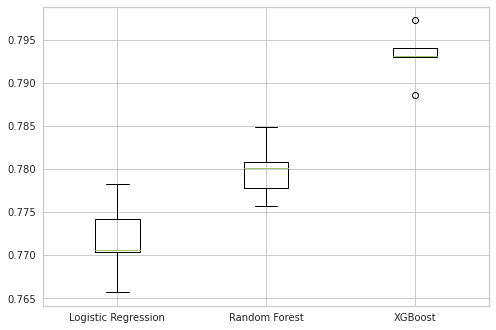

In [79]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "Random Forest": RandomForestClassifier(), "XGBoost": XGBClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=5, shuffle=True, random_state=2486)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, x_train, y_train, cv=kf, scoring='f1_weighted')
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

#### Hyperparameters tunning

In [84]:
# creating the parameter grid
param_grid = {
    'learning_rate': np.arange(.05, 1),
    'max_depth': np.arange(3,10, 1),
    'n_estimators': np.arange(50, 100, 150)
}

In [127]:
# Perform GridSearchCV
xgb_GS = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=2, verbose=1)

In [128]:
xgb_GS.fit(x_train, y_train)

Fitting 2 folds for each of 399 candidates, totalling 798 fits
[13:24:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[13:24:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[Parallel(n_jobs=1)]: Done 798 out of 798 | elapsed: 87.9min finished


[14:52:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     seed=123, subsample=None, tree_method=None,
                                     validate_paramete

In [129]:
# Compute metrics
print(xgb_GS.best_score_)
print(xgb_GS.best_estimator_)

0.8087540545755355
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.25, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=123, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, seed=123, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)


#### Bayes optimization

In [81]:
!pip install scikit-optimize

     |████████████████████████████████| 100 kB 18.7 MB/s           


In [82]:
from skopt import BayesSearchCV, space, plots
from sklearn.metrics.scorer import make_scorer

In [85]:
xgb_BSearch = BayesSearchCV(xgb_model, param_grid, n_iter = 10, scoring='f1_weighted', cv = 5, 
                       refit = False, verbose = 0)

In [86]:
xgb_BSearch = xgb_BSearch.fit(x_train, y_train)

[14:41:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

In [87]:
print(xgb_BSearch.best_score_)
print(xgb_BSearch.best_params_)

0.7927424353471088
OrderedDict([('learning_rate', 0.05), ('max_depth', 8), ('n_estimators', 50)])


## output

In [77]:
y_test

,y
46241,2
87841,2
31981,2
91119,0
101087,2
...,...
38410,2
102241,2
3102,1
117682,2


In [78]:
y_test_df = y_test.reset_index()

In [79]:
y_test_df

,index,y
0,46241,2
1,87841,2
2,31981,2
3,91119,0
4,101087,2
...,...,...
36743,38410,2
36744,102241,2
36745,3102,1
36746,117682,2


In [80]:
y_test['y'].value_counts(normalize=True).sort_values()

0    0.055404
1    0.190242
2    0.754354
Name: y, dtype: float64

In [81]:
y_test['y'].value_counts().sort_values()

0     2036
1     6991
2    27721
Name: y, dtype: int64

In [82]:
y_predicted_xgb

array([2, 2, 2, ..., 1, 2, 2])

In [83]:
y_predicted_xgb_df = pd.DataFrame(y_predicted_xgb, columns = ['y_hat'])
print(y_predicted_xgb_df)

       y_hat
0          2
1          2
2          2
3          1
4          2
...      ...
36743      2
36744      2
36745      1
36746      2
36747      2

[36748 rows x 1 columns]


In [84]:
y_predicted_xgb_df['y_hat'].value_counts(normalize=True).sort_values()

0    0.035458
1    0.136388
2    0.828154
Name: y_hat, dtype: float64

In [85]:
y_predict_proba_xgb = xgb_model.predict_proba(x_test)
y_predict_proba_xgb 

array([[0.07178485, 0.10973313, 0.81848204],
       [0.10608965, 0.20098682, 0.6929235 ],
       [0.04453852, 0.05644691, 0.8990146 ],
       ...,
       [0.5483383 , 0.36467442, 0.08698731],
       [0.05777104, 0.29608127, 0.6461477 ],
       [0.04426657, 0.06220824, 0.89352524]], dtype=float32)

In [86]:
y_predicted_probabilites = y_predict_proba_xgb[:, -1]
y_predicted_probabilites

array([0.81848204, 0.6929235 , 0.8990146 , ..., 0.08698731, 0.6461477 ,
       0.89352524], dtype=float32)

In [87]:
y_predicted_probabilites.shape

(36748,)

In [88]:
y_predicted_probabilites_df=pd.DataFrame(y_predicted_probabilites)
y_predicted_probabilites_df

,0
0,0.818482
1,0.692923
2,0.899015
3,0.085474
4,0.852658
...,...
36743,0.839272
36744,0.818482
36745,0.086987
36746,0.646148


In [89]:
y_predicted_probabilites_df.rename(columns = {0:'Score_1'}, inplace = True)

In [90]:
y_predicted_probabilites_df

,Score_1
0,0.818482
1,0.692923
2,0.899015
3,0.085474
4,0.852658
...,...
36743,0.839272
36744,0.818482
36745,0.086987
36746,0.646148


In [91]:
y_test_df

,index,y
0,46241,2
1,87841,2
2,31981,2
3,91119,0
4,101087,2
...,...,...
36743,38410,2
36744,102241,2
36745,3102,1
36746,117682,2


In [92]:
#decile_df = y_predicted_probabilites_df.join(y_test)
tbl_for_summary = pd.concat([y_test_df, y_predicted_probabilites_df,y_predicted_xgb_df], axis=1)
tbl_for_summary

,index,y,Score_1,y_hat
0,46241,2,0.818482,2
1,87841,2,0.692923,2
2,31981,2,0.899015,2
3,91119,0,0.085474,1
4,101087,2,0.852658,2
...,...,...,...,...
36743,38410,2,0.839272,2
36744,102241,2,0.818482,2
36745,3102,1,0.086987,1
36746,117682,2,0.646148,2


In [93]:
tbl_for_summary['Score_0'] = 1 - tbl_for_summary['Score_1']

In [94]:
tbl_for_summary

,index,y,Score_1,y_hat,Score_0
0,46241,2,0.818482,2,0.181518
1,87841,2,0.692923,2,0.307077
2,31981,2,0.899015,2,0.100985
3,91119,0,0.085474,1,0.914526
4,101087,2,0.852658,2,0.147342
...,...,...,...,...,...
36743,38410,2,0.839272,2,0.160728
36744,102241,2,0.818482,2,0.181518
36745,3102,1,0.086987,1,0.913013
36746,117682,2,0.646148,2,0.353852


In [95]:
tbl_for_summary['decile'] = pd.qcut(tbl_for_summary['Score_1'].rank(method='first', ascending=False), 10, labels = list(range(1,11)), duplicates='drop')

In [96]:
tbl_for_summary

,index,y,Score_1,y_hat,Score_0,decile
0,46241,2,0.818482,2,0.181518,3
1,87841,2,0.692923,2,0.307077,5
2,31981,2,0.899015,2,0.100985,1
3,91119,0,0.085474,1,0.914526,10
4,101087,2,0.852658,2,0.147342,2
...,...,...,...,...,...,...
36743,38410,2,0.839272,2,0.160728,3
36744,102241,2,0.818482,2,0.181518,4
36745,3102,1,0.086987,1,0.913013,10
36746,117682,2,0.646148,2,0.353852,5


In [97]:
tbl_for_summary['y_promoters'] = [1 if x == 2 else 0 for x in tbl_for_summary['y']]

In [98]:
tbl_for_summary

,index,y,Score_1,y_hat,Score_0,decile,y_promoters
0,46241,2,0.818482,2,0.181518,3,1
1,87841,2,0.692923,2,0.307077,5,1
2,31981,2,0.899015,2,0.100985,1,1
3,91119,0,0.085474,1,0.914526,10,0
4,101087,2,0.852658,2,0.147342,2,1
...,...,...,...,...,...,...,...
36743,38410,2,0.839272,2,0.160728,3,1
36744,102241,2,0.818482,2,0.181518,4,1
36745,3102,1,0.086987,1,0.913013,10,0
36746,117682,2,0.646148,2,0.353852,5,1


In [99]:
summarized_tbl = tbl_for_summary.groupby("decile").agg(count = ("y","count"), actual = ("y_promoters","sum"), max = ("Score_1","max"), min = ("Score_1","min"))

In [100]:
summarized_tbl['Cumulative actual'] = summarized_tbl['actual'].cumsum()

In [101]:
summarized_tbl['Cumulative Abs values'] = summarized_tbl['actual'].cumsum()/ summarized_tbl['actual'].sum()

In [102]:
summarized_tbl['Cumulative %'] = summarized_tbl['Cumulative Abs values'].apply(lambda x: f'{x:.2%}')

In [103]:
summarized_tbl.reset_index(inplace=True)
summarized_tbl

,decile,count,actual,max,min,Cumulative actual,Cumulative Abs values,Cumulative %
0,1,3675,3611,0.915835,0.893525,3611,0.130262,13.03%
1,2,3675,3601,0.893525,0.840505,7212,0.260164,26.02%
2,3,3675,3537,0.840505,0.818482,10749,0.387757,38.78%
3,4,3674,3481,0.818482,0.739971,14230,0.513329,51.33%
4,5,3675,3330,0.739971,0.612776,17560,0.633455,63.35%
5,6,3675,3060,0.612746,0.476150,20620,0.743840,74.38%
6,7,3674,2666,0.476135,0.338473,23286,0.840013,84.00%
7,8,3675,2198,0.338473,0.218272,25484,0.919303,91.93%
8,9,3675,1503,0.218272,0.114269,26987,0.973522,97.35%
9,10,3675,734,0.114183,0.020033,27721,1.000000,100.00%


In [104]:
plot_cum = list(summarized_tbl['Cumulative Abs values'])
plot_cum

[0.13026225605136899,
 0.26016377475560043,
 0.3877565744381516,
 0.5133292449767325,
 0.6334547815735363,
 0.7438404097976263,
 0.840012986544497,
 0.9193030554453303,
 0.9735218787201039,
 1.0]

In [105]:
count = list(summarized_tbl['count'])
count

[3675, 3675, 3675, 3674, 3675, 3675, 3674, 3675, 3675, 3675]

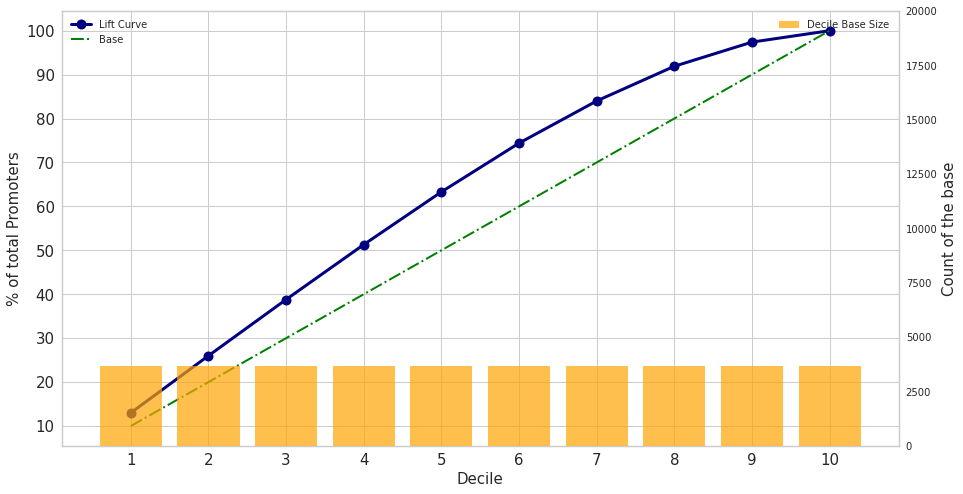

In [109]:
decile = [1,2,3,4,5,6,7,8,9,10]

fig, ax = plt.subplots(figsize=(15,8))

plt.plot(decile, [round(x*100,1) for x in plot_cum], marker='o', c='Navy', markersize=10, linewidth=3, label="Lift Curve", zorder=10)

plt.plot([1, 10], [10,100 ], color='green', linestyle='dashdot', linewidth=2, label="Base", zorder=10)
plt.xlabel('Decile', fontsize=15)
plt.legend(loc='best')
plt.ylabel('% of total Promoters', fontsize=15)
plt.xticks(np.arange(1, 10+1, 1), fontsize=15)
plt.yticks(np.arange(10, 100+1, 10), fontsize=15)

ax2 = ax.twinx()

ax2.bar(decile, count, color='orange', label='Decile Base Size', zorder=11, alpha=0.7)
#ax2.bar(deciles + width, base, width, color='blue', label='Decile base size', zorder=11, alpha=0.7)
ax2.legend(loc=1)

ax2.set_ylim(0, 20000)
ax2.set_ylabel('Count of the base', fontsize=15)
plt.grid()
plt.show()

In [107]:
ct = pd.crosstab(tbl_for_summary['y'], tbl_for_summary['y_hat'], margins=True, margins_name='Total')
ct

y_hat,0,1,2,Total
y,,,,
0,892,719,425,2036
1,270,2734,3987,6991
2,141,1559,26021,27721
Total,1303,5012,30433,36748
